<a href="https://colab.research.google.com/github/Fextstar/customer-segmentation-ml/blob/main/Random_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Kết nối và Đọc Dữ liệu**

In [ ]:
from google.colab import drive
import pandas as pd

# Kết nối với Google Drive
drive.mount('/content/drive')

# Đọc dataset
file_path = '/content/drive/My Drive/Mall_Customers.csv'
data = pd.read_csv(file_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Tiền Xử Lý Dữ Liệu**

In [ ]:
# Loại bỏ các cột không cần thiết
data = data.drop('CustomerID', axis=1)

**Phân Loại Khách Hàng Theo Nhãn**

In [ ]:
# Phân loại khách hàng theo nhãn dựa trên Annual Income và Spending Score
def categorize_customer(row):
    if row['Annual Income (k$)'] > 70 and row['Spending Score (1-100)'] > 50:
        return 'VIP'
    elif row['Annual Income (k$)'] > 70 and row['Spending Score (1-100)'] <= 50:
        return 'Tiềm năng'
    elif row['Annual Income (k$)'] <= 40 and row['Spending Score (1-100)'] <= 50:
        return 'Tiết kiệm'
    elif 40 < row['Annual Income (k$)'] <= 70 and row['Spending Score (1-100)'] <= 50:
        return 'Trung bình'
    else:
        return 'Khách thường'

data['Category'] = data.apply(categorize_customer, axis=1)
data['Category'].value_counts()

,count
Category,
Khách thường,60
Trung bình,40
Tiềm năng,37
VIP,37
Tiết kiệm,26


**Biểu Đồ Phân Bố Theo Nhóm Khách Hàng**

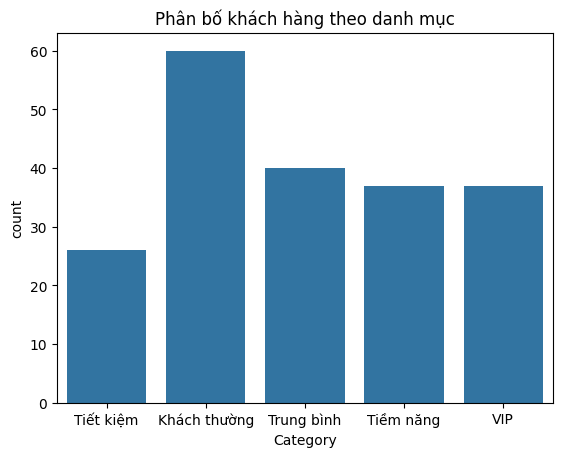

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Biểu đồ phân bố theo nhóm khách hàng
sns.countplot(x='Category', data=data)
plt.title('Phân bố khách hàng theo danh mục')
plt.show()

**Biểu Đồ Ma Trận Tương Quan**

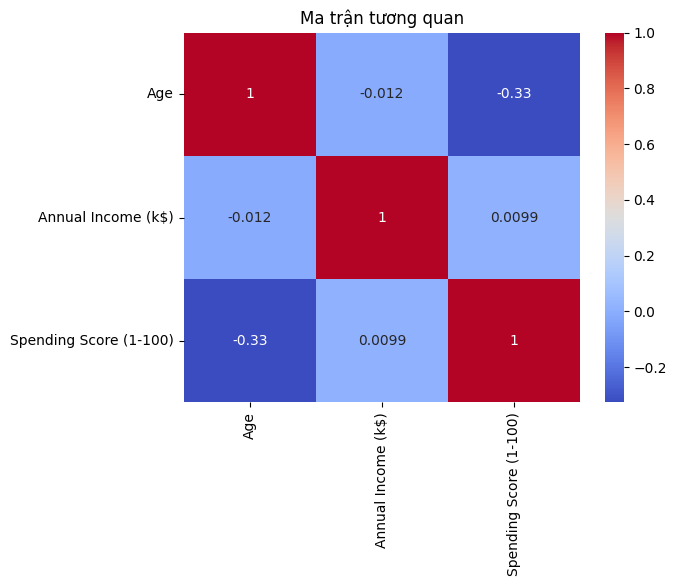

In [ ]:
# Lọc các cột số để tính toán ma trận tương quan
numerical_data = data.select_dtypes(include=['number'])
sns.heatmap(numerical_data.corr(), annot=True, cmap='coolwarm')
plt.title('Ma trận tương quan')
plt.show()

**Chuẩn Bị Dữ Liệu Cho Mô Hình**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Chọn các thuộc tính cần thiết (đặc trưng) và nhãn (label)
X = data[['Annual Income (k$)', 'Spending Score (1-100)']]
y = data['Category']

# Chuyển đổi nhãn thành số
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Lưu lại tên các lớp dựa trên thứ tự của LabelEncoder
class_names = le.classes_  # ví dụ: ['Khách thường', 'Tiềm năng', 'Tiết kiệm', 'VIP']

**Chia Tập Dữ Liệu Huấn Luyện và Kiểm Thử**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2,
                                                    random_state=42)

**Kiểm Tra và Cân Bằng Dữ Liệu**

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)

**Huấn Luyện Mô Hình Random Forest với Dữ Liệu Cân Bằng**

In [ ]:
model_balanced = RandomForestClassifier(n_estimators=100, random_state=42)
model_balanced.fit(X_train_bal, y_train_bal)

RandomForestClassifier(random_state=42)

**Dự Đoán Và Tính Toán Accuracy**

In [ ]:
y_pred_bal = model_balanced.predict(X_test)
print("Accuracy (dữ liệu cân bằng):", accuracy_score(y_test, y_pred_bal))
print("\nBáo cáo phân loại (dữ liệu cân bằng):")
print(classification_report(y_test, y_pred_bal, target_names=class_names))

Accuracy (dữ liệu cân bằng): 0.975

Báo cáo phân loại (dữ liệu cân bằng):
              precision    recall  f1-score   support

Khách thường       1.00      1.00      1.00        13
   Tiết kiệm       1.00      1.00      1.00         3
   Tiềm năng       0.92      1.00      0.96        11
  Trung bình       1.00      0.89      0.94         9
         VIP       1.00      1.00      1.00         4

    accuracy                           0.97        40
   macro avg       0.98      0.98      0.98        40
weighted avg       0.98      0.97      0.97        40



**Trực Quan Hóa Kết Quả Dự Đoán**

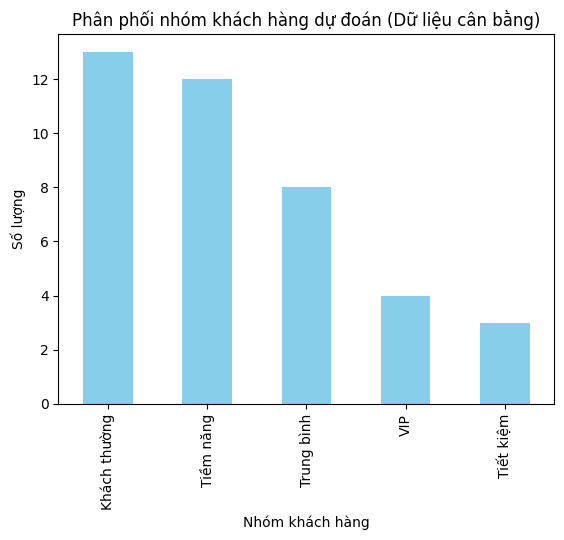

In [ ]:
# Biểu Đồ Phân Phối Nhóm Khách Hàng Dự Đoán
import pandas as pd

predicted_categories_bal = [class_names[label] for label in y_pred_bal]
category_counts_bal = pd.Series(predicted_categories_bal).value_counts()
category_counts_bal.plot(kind='bar', color='skyblue')
plt.title('Phân phối nhóm khách hàng dự đoán (Dữ liệu cân bằng)')
plt.xlabel('Nhóm khách hàng')
plt.ylabel('Số lượng')
plt.show()

**Ma Trận Nhầm Lẫn (Confusion Matrix)**

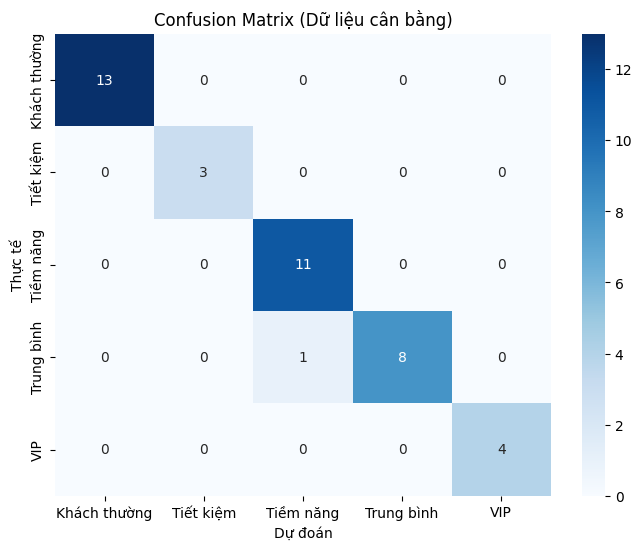

In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np

conf_matrix_bal = confusion_matrix(y_test, y_pred_bal)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_bal, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix (Dữ liệu cân bằng)')
plt.xlabel('Dự đoán')
plt.ylabel('Thực tế')
plt.show()

**Biểu Đồ Tròn Thể Hiện Tỷ Lệ Chính Xác**

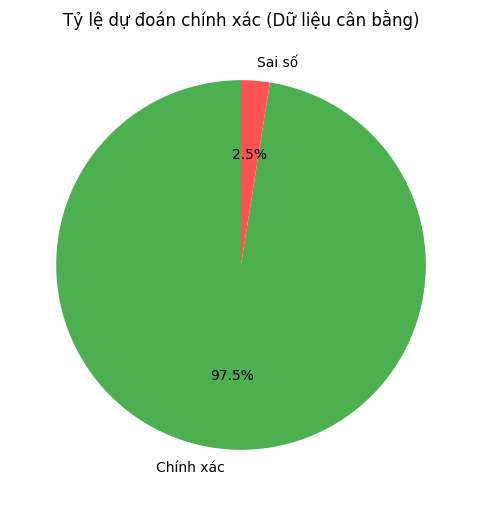

In [ ]:
accuracy_bal = accuracy_score(y_test, y_pred_bal) * 100
plt.figure(figsize=(6, 6))
sizes = [accuracy_bal, 100 - accuracy_bal]
labels = ['Chính xác', 'Sai số']
colors = ['#4CAF50', '#FF5252']
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=90)
plt.title('Tỷ lệ dự đoán chính xác (Dữ liệu cân bằng)')
plt.show()